# SRILASYA GARIGIPATY ASSIGNMENT 5 CLUSTERING  DATA 1200 STUDENT # 100822953

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Load  cancer Dataset
dataset = pd.read_csv('cancer.csv')
dataset.head(5)

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
#Dropping the "id" column prior to analysis
dataset=dataset.drop(['id'],axis=1)

In [8]:
#Displaying first 5 rows of cancer dataset with "id" column dropped
dataset.head(5)

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [16]:
#Check the number of missing values in data
dataset.isna().sum()

Clump Thickness      0
UofCSize             0
UofCShape            0
Marginal Adhesion    0
SECSize              0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Class                0
dtype: int64

In [21]:
#Determine the various columns in dataset
cols=dataset.columns
cols

Index(['Clump Thickness', 'UofCSize', 'UofCShape', 'Marginal Adhesion',
       'SECSize', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [24]:
#Taking the features from the dataset copy and scaling them using log function
features = dataset.copy()
cols =  [ 'Clump Thickness', 'UofCSize', 'UofCShape', 'Marginal Adhesion',
       'SECSize', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses']

# Note: Adding 1 for each value to avoid inf values
features[cols] = np.log(1 + features[cols])
features.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1.791759,0.693147,0.693147,0.693147,1.098612,0.693147,1.386294,0.693147,0.693147,2
1,1.791759,1.609438,1.609438,1.791759,2.079442,2.397895,1.386294,1.098612,0.693147,2
2,1.386294,0.693147,0.693147,0.693147,1.098612,1.098612,1.386294,0.693147,0.693147,2
3,1.945910,2.197225,2.197225,0.693147,1.386294,1.609438,1.386294,2.079442,0.693147,2
4,1.609438,0.693147,0.693147,1.386294,1.098612,0.693147,1.386294,0.693147,0.693147,2


In [25]:
#Check the outliers in cancer dataset
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(features)

Clump Thickness --------- 0
UofCSize --------- 0
UofCShape --------- 0
Marginal Adhesion --------- 0
SECSize --------- 31
Bare Nuclei --------- 0
Bland Chromatin --------- 0
Normal Nucleoli --------- 0
Mitoses --------- 120
Class --------- 0


In [70]:
#Correlation of the independent variables with the dependent variable "Class"
dataset.corr()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UofCSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UofCShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SECSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


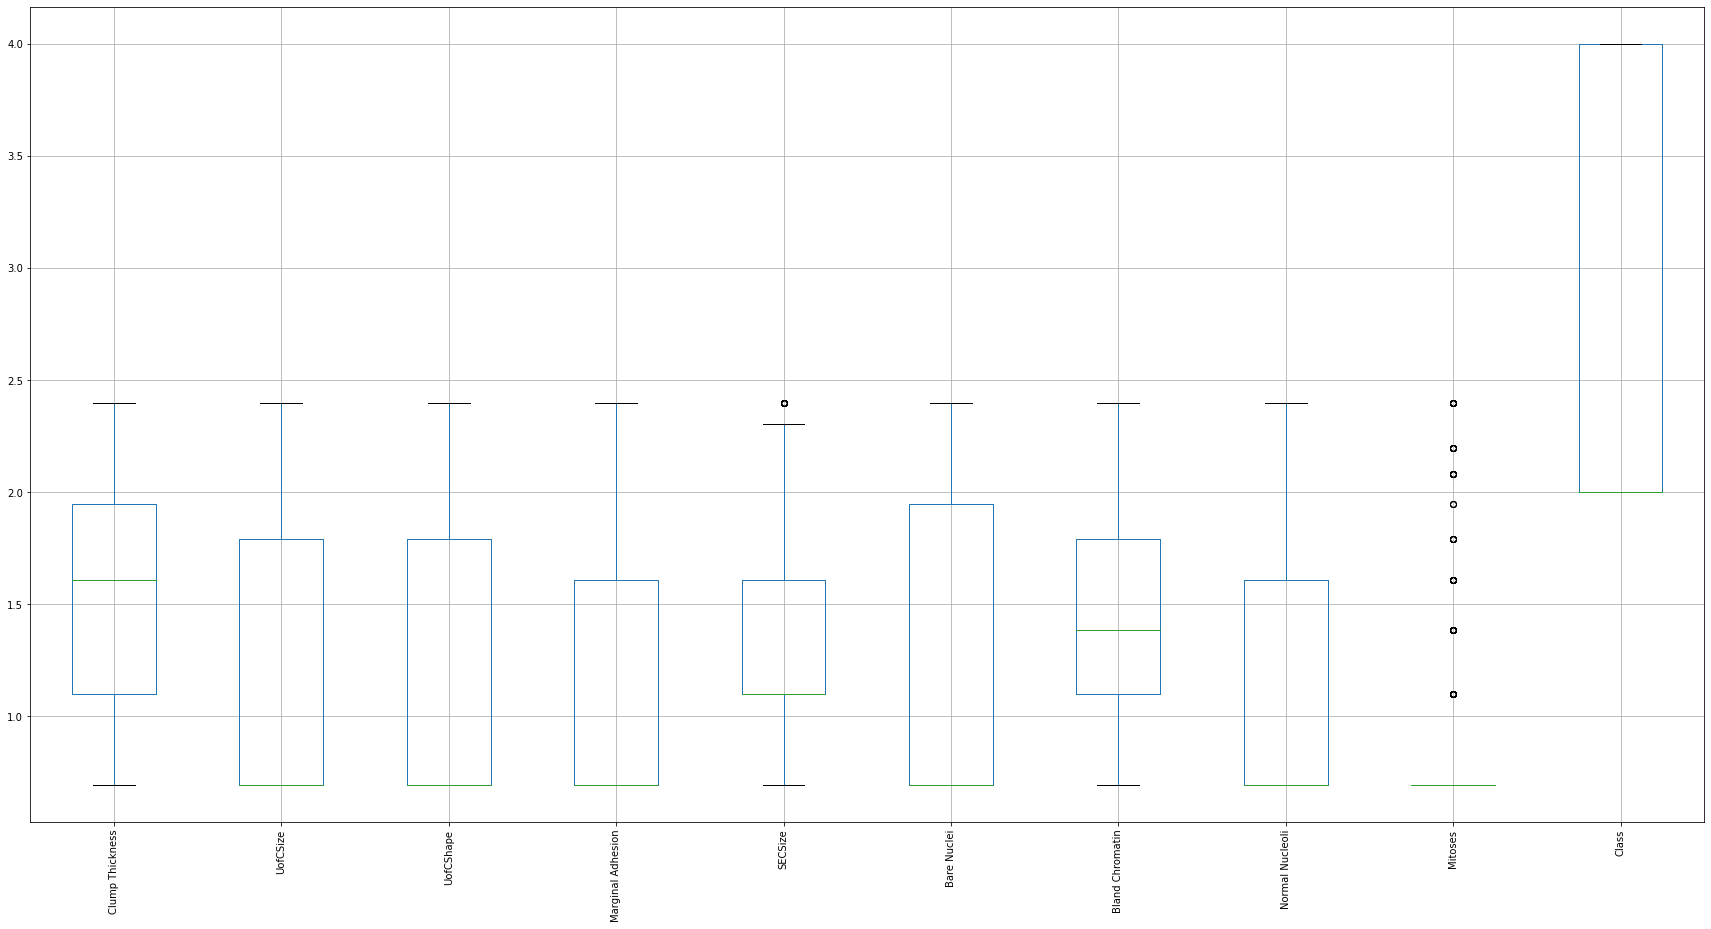

In [26]:
# box plot in cancer dataset to visualize
features.boxplot(rot=90, figsize=(30,15))

In [27]:
#Information about cancer dataset 
dataset.info

<bound method DataFrame.info of      Clump Thickness  UofCSize  UofCShape  Marginal Adhesion  SECSize  \
0                  5         1          1                  1        2   
1                  5         4          4                  5        7   
2                  3         1          1                  1        2   
3                  6         8          8                  1        3   
4                  4         1          1                  3        2   
..               ...       ...        ...                ...      ...   
678                3         1          1                  1        3   
679                2         1          1                  1        2   
680                5        10         10                  3        7   
681                4         8          6                  4        3   
682                4         8          8                  5        4   

     Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0              1      

In [28]:
#Creating a function that does all of the above tasks in one go(Shape, Datatypes, Missng Values, Unique Values, Descriptive stats)
def get_basic_stats(dfname):
    print("Shape of dataframe is " + str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique().sort_values())
    print("Below are some records in DF")
    print(dfname.head())
    print("Basic Stats for numeric variables")
    print(dfname.describe())

In [29]:
# getting all the basic stats for dataset
get_basic_stats(dataset)

Shape of dataframe is (683, 10)
Below are datatypes of columns in DF
Clump Thickness      int64
UofCSize             int64
UofCShape            int64
Marginal Adhesion    int64
SECSize              int64
Bare Nuclei          int64
Bland Chromatin      int64
Normal Nucleoli      int64
Mitoses              int64
Class                int64
dtype: object
Below are missing values in each column
Clump Thickness      0
UofCSize             0
UofCShape            0
Marginal Adhesion    0
SECSize              0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Class                0
dtype: int64
Below are the number of unique values taken by a column
Class                 2
Mitoses               9
Clump Thickness      10
UofCSize             10
UofCShape            10
Marginal Adhesion    10
SECSize              10
Bare Nuclei          10
Bland Chromatin      10
Normal Nucleoli      10
dtype: int64
Below are some records in DF
   Clump Thickness  UofCSi

In [46]:
#Create x (we ignore the y variable)
x = dataset.drop('Class', axis=1).to_numpy()

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)

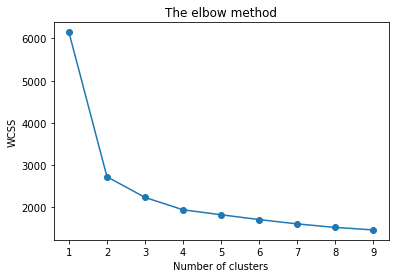

In [47]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()    

For n_clusters= 2, The Silhouette Coefficient is 0.5720321393105906
For n_clusters= 3, The Silhouette Coefficient is 0.5035150478533867
For n_clusters= 4, The Silhouette Coefficient is 0.5048464633188064
For n_clusters= 5, The Silhouette Coefficient is 0.23579791736042519
For n_clusters= 6, The Silhouette Coefficient is 0.2281161754521486
For n_clusters= 7, The Silhouette Coefficient is 0.2293316085180714
For n_clusters= 8, The Silhouette Coefficient is 0.2329240994533941
For n_clusters= 9, The Silhouette Coefficient is 0.24330413016748986


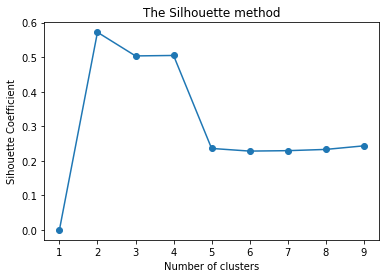

In [48]:
#Create Silhouette Coefficients
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#Plot Silhouette
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()        

Text(0.5, 0, 'k')

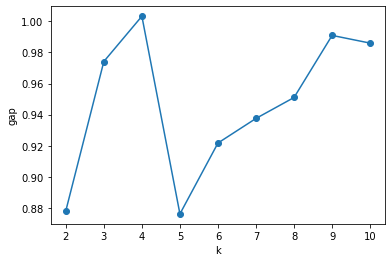

In [49]:
#Create Gap Statistic
from sklearn.metrics import pairwise_distances
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(2, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(2, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return abs(gap), np.log(reference_inertia), np.log(ondata_inertia)

k_max = 10
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), data_transformed, k_max)

#Plot Gap Statistic

plt.plot(range(2, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')

In [50]:
#Create KMeans with 2 Clusters

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Add Prediction column to dataset
dataset2= dataset.drop('Class', axis=1)
dataset2['New Cluster']=kmeans.labels_
dataset2['New Cluster'] = dataset2['New Cluster'].map({0:'Cluster 1', 1:'Cluster 2'}) 
dataset2.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,New Cluster
0,5,1,1,1,2,1,3,1,1,Cluster 1
1,5,4,4,5,7,10,3,2,1,Cluster 2
2,3,1,1,1,2,2,3,1,1,Cluster 1
3,6,8,8,1,3,4,3,7,1,Cluster 2
4,4,1,1,3,2,1,3,1,1,Cluster 1


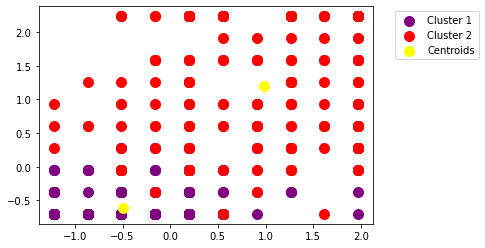

In [51]:
#Plot of 2 Clusters for Cancer dataset
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

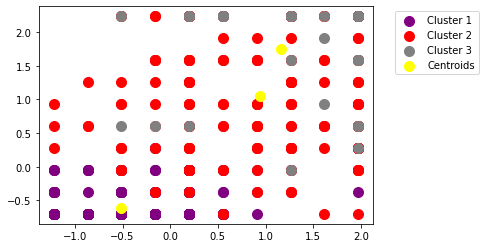

In [52]:
#If we keep the Original Three Clusters for Cancer dataset

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Plot of 3 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_transformed[y_kmeans == 2, 0], data_transformed[y_kmeans == 2, 1], s = 100, c = 'grey', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [84]:
 #Accuracy Score of K-Means Algorithm with number of clusters-=2
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 2)
cluster.fit(x)
pred = cluster.labels_
score = round(accuracy_score(pred, y_kmeans), 4)
print('Accuracy scored using k-means clustering: ', score)

Accuracy scored using k-means clustering:  0.7994


In [85]:
#Determining the location of the centroids for the Clusters
kmeans.cluster_centers_

array([[7.24347826, 4.73043478, 5.00869565, 4.47826087, 4.15652174,
        8.19130435, 4.94782609, 3.89565217, 1.73043478],
       [2.94117647, 1.25113122, 1.36199095, 1.31447964, 2.06108597,
        1.27149321, 2.05882353, 1.22171946, 1.07013575],
       [7.15079365, 8.37301587, 8.07936508, 6.64285714, 6.50793651,
        7.27777778, 6.93650794, 7.71428571, 3.35714286]])